### Nicht augmentierten Daten

In [7]:
file_id="1uKc-AC5sRTU0BU1qGlV8MPOIv2xZills"
!gdown https://drive.google.com/uc?id={file_id}

Downloading...
From (original): https://drive.google.com/uc?id=1uKc-AC5sRTU0BU1qGlV8MPOIv2xZills
From (redirected): https://drive.google.com/uc?id=1uKc-AC5sRTU0BU1qGlV8MPOIv2xZills&confirm=t&uuid=71ad6aa5-f5b5-4735-a04a-2e18c0888027
To: /content/Plant_leaf_diseases_dataset_without_augmentation.zip
100% 868M/868M [00:11<00:00, 78.1MB/s]


In [8]:
#!unzip -q Plant_leaf_diseases_dataset_without_augmentation.zip

replace Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (1).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (10).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (100).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (101).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (102).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (103).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Plant_leave_diseases_dataset_without_augmentation/Apple___Apple_scab/image (104).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace Plant_leave_diseases_da

## Erste Schritte

In [3]:
!pip install opencv-python

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Plotting 5 samples of Apple___healthy:


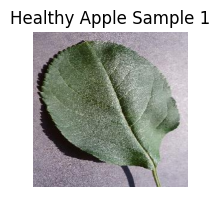

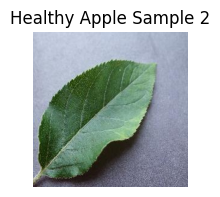

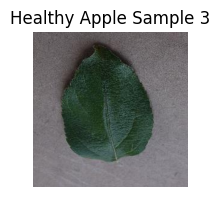

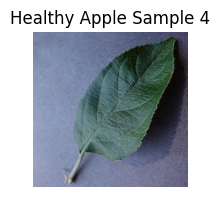

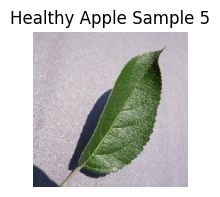

In [42]:
print("Plotting 5 samples of Apple___healthy:")
healthy_path = "/content/Plant_leave_diseases_dataset_without_augmentation/Apple___healthy"
healthy_files_list = os.listdir(healthy_path)

num_samples = 5 # Sample
selected_healthy_files = healthy_files_list[:num_samples]

next_healthy_plant = [os.path.join(healthy_path, fname) for fname in selected_healthy_files]

for i, img_path in enumerate(next_healthy_plant):
    img = mpimg.imread(img_path)
    plt.figure(figsize=(2, 3))
    plt.imshow(img)
    plt.title(f"Healthy Apple Sample {i+1}")
    plt.axis('Off')
    plt.show()


### Train-Test-Datenaufteilung

In [36]:
import random
import shutil

# Verzeichnisse
data_dir = "/content/Plant_leave_diseases_dataset_without_augmentation"
train_dir = "/content/train_dataset"
test_dir = "/content/test_dataset"

# Erstelle Zielordner für Test- und Trainingsdaten
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

# Gehe durch alle Klassen
for root, dirs, files in os.walk(data_dir):
    for class_name in dirs:
        # Überprüfe, ob der Ordner tatsächlich Bilder enthält
        class_path = os.path.join(root, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg'))]

        if image_files:
            sample_size = int(0.2 * len(image_files))  # 20% für Testdaten
            sampled_files = random.sample(image_files, sample_size)

            # Kopiere Testdaten
            for file in sampled_files:
                src_path = os.path.join(class_path, file)
                dest_path = os.path.join(test_dir, class_name, file)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

            # Kopiere Trainingsdaten (der Rest der Bilder)
            remaining_files = set(image_files) - set(sampled_files)
            for file in remaining_files:
                src_path = os.path.join(class_path, file)
                dest_path = os.path.join(train_dir, class_name, file)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

print("Train-Test-Datenaufteilung abgeschlossen.")

Train-Test-Datenaufteilung abgeschlossen.


### Bildaugmentation für Trainingsdatensatz

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentierung für den Trainingsdatensatz
train_datagen = ImageDataGenerator(
    rescale=1.0/255,            # Bildskalierung
    rotation_range=40,          # Rotation
    width_shift_range=0.2,      # Verschiebung in der Breite
    height_shift_range=0.2,     # Verschiebung in der Höhe
    shear_range=0.2,            # Scherung
    zoom_range=0.2,             # Zoom
    horizontal_flip=True,       # Horizontal spiegeln
    fill_mode='nearest'         # Füllen der leeren Stellen
)

# Ohne Augmentierungen für Testdaten
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Trainingsdaten mit Augmentierungen
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Eingabebildgröße
    batch_size=32,
    class_mode='categorical'  # Mehrklassenklassifikation
)

# Testdaten ohne Augmentierungen
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 55448 images belonging to 39 classes.
Found 11077 images belonging to 39 classes.
